<a href="https://colab.research.google.com/github/EricaSG/Capstone/blob/master/Primary_Capstone_Greyscale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Business Understanding

“Misdiagnosis of pneumonia will delay treatment and can result in long-term disability or death... pneumonia is misdiagnosed at an alarming rate, even among patients who are readmitted to the hospital after suffering from pneumonia in the recent past...One of the most effective ways to diagnose pneumonia is by chest x-ray. However, a chest x-ray in a person with pneumonia does not always have the characteristic “infiltrate” if it is early in the course of the illness. Sometimes, the infiltrate may be in a portion of the lung that is not easily seen by standard x-ray, and other patients may have congestive heart failure or scarring in their lungs, which can mimic pneumonia.” **This analysis aims to prove that if X-ray images are colorized, the rate of misdiagnosis (and complications associated) will decrease.**

Source: https://thistlelaw.com/do-you-have-a-case-for-the-misdiagnosis-of-pneumonia/



In [18]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
# Increase RAM
i = []

while(True):

    i.append('a')

In [10]:
!pip install -q --upgrade ipython


In [11]:
!pip install -q --upgrade ipykernel

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 2. Data Understanding

quick summary of data here.

# 3. Data Preparation

## Import Necessary Libraries

In [2]:
import warnings
warnings.filterwarnings('ignore')
import random 
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras import layers
from keras.models import Sequential
from sklearn.model_selection import train_test_split, cross_val_predict
from keras import regularizers
from keras.wrappers.scikit_learn import KerasRegressor
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error
import itertools
from keras.applications.vgg16 import preprocess_input, VGG16
from keras.optimizers import Adam, Adadelta, Adagrad, SGD, RMSprop
from keras import initializers
from keras.constraints import unit_norm, min_max_norm
from keras.applications.inception_v3 import InceptionV3

## Address Class Imbalance

In [ ]:
# Use if downloading from a local machine
# Get the Directory Path of the Train, Validation, and Test Images
# train_dir = 'chest_xray/chest_xray/train/'
# val_dir = 'chest_xray/chest_xray/val/'
# test_dir = 'chest_xray/chest_xray/test/'

In [ ]:
!ls drive

'My Drive'  'Shared drives'


In [ ]:
!ls '/content/drive/My Drive/chest_xray'

test  train  val


In [3]:
# Use if downloding data from the cloud
train_dir = '/content/drive/My Drive/chest_xray/train'
val_dir = '/content/drive/My Drive/chest_xray/val'
test_dir = '/content/drive/My Drive/chest_xray/test'


In [4]:
# Establish the criteria for data augementation
datagen = ImageDataGenerator(
            rotation_range = 0,
            width_shift_range = 0,
            height_shift_range = 0,
            rescale = None,
            shear_range = 0,
            zoom_range = 0,
            horizontal_flip = False,
            fill_mode = 'nearest')

### Increase Normal Images to 5600

In [19]:
# Select a random normal image to duplicate. Put the image path into load_img
norm_img = load_img('/content/drive/My Drive/chest_xray/train/NORMAL/IM-0115-0001.jpeg')

In [20]:
# Get the size of the image
norm_img.getpixel

<bound method Image.getpixel of <PIL.Image.Image image mode=RGB size=2090x1858 at 0x7FB5B9A72A58>>

In [21]:
# Convert the image to an array
norm_img_array = img_to_array(norm_img)

In [22]:
norm_img_array.shape

(1858, 2090, 3)

In [23]:
norm_img_array = norm_img_array.reshape((1,) + norm_img_array.shape)
norm_img_array.shape

(1, 1858, 2090, 3)

In [24]:
# List directory where images will be stored
norm_dir = '/content/drive/My Drive/chest_xray/train/NORMAL/'

In [ ]:
# Add 4259 Images to Normal
count = 0
for batch in datagen.flow(norm_img_array, batch_size=30, save_to_dir=norm_dir, save_prefix='IM', save_format='jpeg'):
    count +=1
    if count == 317:
        break
print('4259 images have been generated at', norm_dir)


4259 images have been generated at /content/drive/My Drive/chest_xray/train/NORMAL/


In [ ]:
# count = 0
# for batch in datagen.flow(norm_img_array, batch_size=, save_to_dir=norm_dir, save_prefix='IM', save_format='jpeg'):
#     count +=1
#     if count == :
#         break
# print(' images have been generated at', norm_dir)

### Increase Pneumonia Images to 5600

In [25]:
# Select a random pneumonia image to duplicate
pneum_img = load_img('/content/drive/My Drive/chest_xray/train/PNEUMONIA/person23_bacteria_92.jpeg')

In [26]:
pneum_img.getpixel

<bound method Image.getpixel of <PIL.Image.Image image mode=RGB size=1080x712 at 0x7FB5B9A72358>>

In [27]:
pneum_img_array = img_to_array(pneum_img)

In [28]:
pneum_img_array.shape

(712, 1080, 3)

In [29]:
# Reshape the array to a (1 x n) array
pneum_img_array = pneum_img_array.reshape((1,) + pneum_img_array.shape)
pneum_img_array.shape

(1, 712, 1080, 3)

In [30]:
# List directory where images will be stored
pneum_dir = '/content/drive/My Drive/chest_xray/train/PNEUMONIA/'

In [ ]:
count = 0
for batch in datagen.flow(pneum_img_array, batch_size=30, save_to_dir=pneum_dir, save_prefix='IM', save_format='jpeg'):
    count +=1
    if count == 317:
        break
print('1725 additional images have been generated at', pneum_dir)
    

1725 additional images have been generated at /content/drive/My Drive/chest_xray/train/PNEUMONIA/


In [ ]:
# count = 0
# for batch in datagen.flow(pneum_img_array, batch_size=100, save_to_dir=pneum_dir, save_prefix='IM', save_format='jpeg'):
#     count +=1
#     if count == 800:
#         break
# print('800 additional images have been generated at', pneum_dir)
    

## Preprocessing

### Read in & Normalize Images

In [27]:
# Resize all 11,200 images in the train directory
train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(train_dir,
                                                     target_size=(96,96), batch_size=11200, color_mode='grayscale')

Found 15764 images belonging to 2 classes.


In [28]:
# Resize all 16 images in the train directory
val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(val_dir,
                                                   target_size=(96,96), batch_size=16, color_mode='grayscale')


Found 16 images belonging to 2 classes.


In [29]:
# Resize all 624 images in the test directory
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(test_dir,
                                                   target_size=(96,96), batch_size=624, color_mode='grayscale')



Found 624 images belonging to 2 classes.


### Generate Image and Label Sets

In [32]:
# Iterate through all of the images and create image-label datasets
train_images, train_labels = next(train_generator)

In [30]:
val_images, val_labels = next(val_generator)

In [31]:
test_images, test_labels = next(test_generator)

In [33]:
# Recheck for Class Imbalance
u = np.unique(train_labels, return_counts=True)
np.asarray(u).T
u

(array([0., 1.], dtype=float32), array([11200, 11200]))

### Preview Images

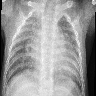

In [ ]:
# Train
array_to_img(train_images[1000])

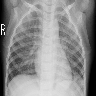

In [ ]:
# Validation
array_to_img(val_images[8])

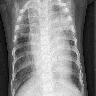

In [ ]:
# Test
array_to_img(test_images[500])

### Check the Shape of the Image & Label Arrays

In [34]:
print('Shape of Train Images: ', np.shape(train_images))
print('Shape of Train Labels: ', np.shape(train_labels))
print('Shape of Validation Images: ', np.shape(val_images))
print('Shape of Validation Labels: ', np.shape(val_labels))
print('Shape of Test Images: ', np.shape(test_images))
print('Shape of Test Labels: ', np.shape(test_labels))

Shape of Train Images:  (11200, 96, 96, 1)
Shape of Train Labels:  (11200, 2)
Shape of Validation Images:  (16, 96, 96, 1)
Shape of Validation Labels:  (16, 2)
Shape of Test Images:  (624, 96, 96, 1)
Shape of Test Labels:  (624, 2)


### Transform the labels to (m X 1) matrices

In [35]:
train_labels_final = np.reshape(train_labels[:,0], (11200,1))
np.shape(train_labels_final)

(11200, 1)

In [36]:
val_labels_final = np.reshape(val_labels[:,0], (16,1))
np.shape(val_labels_final)

(16, 1)

In [37]:
test_labels_final = np.reshape(test_labels[:,0], (624,1))
np.shape(test_labels_final)

(624, 1)

### Verify the Images and Labels

In [ ]:
# Verify the class labels
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

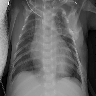

In [ ]:
# Select a random image to verify
array_to_img(train_images[7000])

In [ ]:
# Return the respective label and verify that the label matches the image
train_labels_final[7000, :]

array([0.], dtype=float32)

# 4. Modeling
Start with Greyscale, goal accuracy 80%

## Building the Convolutional Nerual Network

### Model 1: Default Settings w/ Early Stopping

In [38]:
random.seed(123)

model1 = Sequential()

model1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(96, 96, 1)))
model1.add(layers.MaxPooling2D((2, 2)))

model1.add(layers.Conv2D(64, (4, 4), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))

model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2,2)))

model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2,2)))

# Flattening- Convert 2D matrix to a 1D vector
model1.add(layers.Flatten())
model1.add(layers.Dense(512, activation = 'relu'))
model1.add(layers.Dense(1, activation='sigmoid'))

In [39]:
# Return the summary of the model
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 94, 94, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 47, 47, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 44, 44, 64)        32832     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 20, 20, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 128)        

In [40]:
# Compile the model
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [41]:
# Execute "early stopping" to stop the model when the loss has stopped improving
early_stopping = [EarlyStopping(monitor='val_loss', patience=10), 
                  ModelCheckpoint(filepath='model1_default.h5', monitor='val_accuracy', save_best_only=True)]

In [42]:
results1 = model1.fit(train_images, train_labels_final, epochs=100, callbacks=early_stopping, batch_size=750, validation_data=(val_images, val_labels_final))

Epoch 1/100
15/15 [==============================] - 2s 163ms/step - loss: 0.6235 - accuracy: 0.6588 - val_loss: 0.7340 - val_accuracy: 0.5625
Epoch 2/100
15/15 [==============================] - 2s 111ms/step - loss: 0.2280 - accuracy: 0.9153 - val_loss: 0.7809 - val_accuracy: 0.6250
Epoch 3/100
15/15 [==============================] - 2s 111ms/step - loss: 0.1013 - accuracy: 0.9597 - val_loss: 0.3971 - val_accuracy: 0.7500
Epoch 4/100
15/15 [==============================] - 2s 121ms/step - loss: 0.0622 - accuracy: 0.9755 - val_loss: 0.5317 - val_accuracy: 0.8125
Epoch 5/100
15/15 [==============================] - 2s 104ms/step - loss: 0.0470 - accuracy: 0.9824 - val_loss: 0.8264 - val_accuracy: 0.5625
Epoch 6/100
15/15 [==============================] - 2s 111ms/step - loss: 0.0392 - accuracy: 0.9852 - val_loss: 0.3238 - val_accuracy: 0.9375
Epoch 7/100
15/15 [==============================] - 2s 105ms/step - loss: 0.0323 - accuracy: 0.9880 - val_loss: 0.5575 - val_accuracy: 0.6875

### Evaluation: Model 1

In [43]:
results_train1 = model1.evaluate(train_images, train_labels_final)
results_train1

350/350 [==============================] - 1s 4ms/step - loss: 0.0052 - accuracy: 0.9981


[0.005212818738073111, 0.9981250166893005]

In [44]:
results_val1 = model1.evaluate(val_images, val_labels_final)
results_val1

1/1 [==============================] - 0s 2ms/step - loss: 0.3227 - accuracy: 0.8750


[0.3226723074913025, 0.875]

In [47]:
def visualize_training_results(results):
    """
   1 Input: The Training and 
    Validation/Testing Dictionary 
    of Loss and Accuracy
    
    Output: 2 Plots of Loss vs. Epochs
    and Accuracy vs. Epochs
    """
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['Validation Loss', 'Training Loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['Validation Accuracy', 'Training Accuracy'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

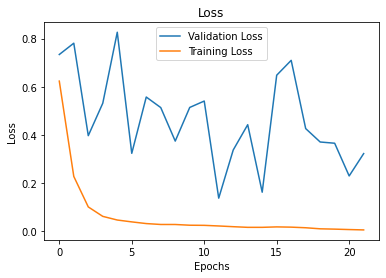

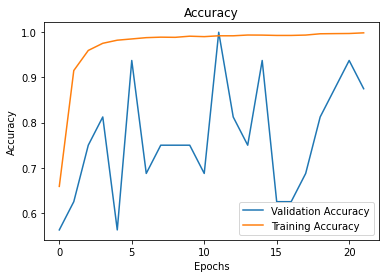

In [48]:
visualize_training_results(results1)

**Observations:**

### Predictions and Metrics

In [49]:
# Make Predictions
preds1 = model1.predict(val_images)

In [50]:
predictions1 = preds1 > 0.5

In [51]:
# Print the classification report showing the metrics Recall, Precision, and F1-Score
classification_report = classification_report(val_labels_final, predictions1)
classification_report

'              precision    recall  f1-score   support\n\n         0.0       0.80      1.00      0.89         8\n         1.0       1.00      0.75      0.86         8\n\n    accuracy                           0.88        16\n   macro avg       0.90      0.88      0.87        16\nweighted avg       0.90      0.88      0.87        16\n'

In [52]:
# Plot a confusion matrix
def plot_confusion_matrix(labels, preds):
    """
    Input: Validation/Testing Labels and
    model predictions
    
    Output: A confusion matrix
    
    """
    
    cnf_matrix = confusion_matrix(labels, preds)

    # Create the basic confusion matrix
    plt.imshow(cnf_matrix,  cmap=plt.cm.Blues) 

    # Add title and axis labels
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    # Add appropriate axis scales
    y = train_generator.class_indices
    class_names = set(y) # Get class labels to add to matrix
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)

    # Add labels to each cell
    thresh = cnf_matrix.max() / 2. # Used for text coloring below
    # Here we iterate through the confusion matrix and append labels to our visualization 
    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
            plt.text(j, i, cnf_matrix[i, j],
                     horizontalalignment='center',
                     color='white' if cnf_matrix[i, j] > thresh else 'black')

    # Add a legend
    plt.colorbar()
    plt.show()

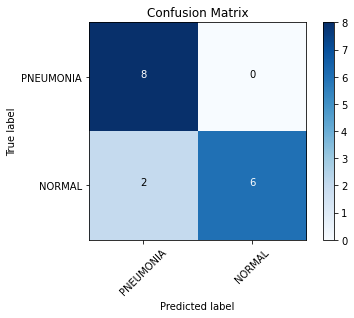

In [53]:
plot_confusion_matrix(val_labels_final, predictions1)

## Model 2: Add L2 Regularizer. Increase Batch Size to 1000

In [54]:
random.seed(123)

model2 = Sequential()

model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(96, 96, 1)))
model2.add(layers.MaxPooling2D((2, 2)))

model2.add(layers.Conv2D(64, (4, 4), activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model2.add(layers.MaxPooling2D((2, 2)))

model2.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model2.add(layers.MaxPooling2D((2,2)))

model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2,2)))

# Flattening- Convert 2D matrix to a 1D vector
model2.add(layers.Flatten())
model2.add(layers.Dense(512, activation = 'relu', kernel_regularizer=regularizers.l2(l=0.01)))
model2.add(layers.Dense(1, activation='sigmoid'))


In [55]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 94, 94, 32)        320       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 47, 47, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 44, 44, 64)        32832     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 20, 20, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 8, 8, 128)        

In [56]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [57]:
save_model = ModelCheckpoint(filepath='model2_l2.h5', monitor='val_accuracy', save_best_only=True)

In [58]:
results2 = model2.fit(train_images, train_labels_final, epochs=22, batch_size=1000, callbacks=save_model, validation_data=(val_images, val_labels_final))

Epoch 1/22
12/12 [==============================] - 2s 164ms/step - loss: 7.7006 - accuracy: 0.5874 - val_loss: 5.0232 - val_accuracy: 0.5000
Epoch 2/22
12/12 [==============================] - 2s 139ms/step - loss: 3.6679 - accuracy: 0.7010 - val_loss: 2.5706 - val_accuracy: 0.6250
Epoch 3/22
12/12 [==============================] - 2s 134ms/step - loss: 1.7041 - accuracy: 0.9379 - val_loss: 1.6206 - val_accuracy: 0.6250
Epoch 4/22
12/12 [==============================] - 2s 137ms/step - loss: 0.9375 - accuracy: 0.9602 - val_loss: 1.1984 - val_accuracy: 0.7500
Epoch 5/22
12/12 [==============================] - 2s 132ms/step - loss: 0.6127 - accuracy: 0.9722 - val_loss: 1.1440 - val_accuracy: 0.6250
Epoch 6/22
12/12 [==============================] - 2s 140ms/step - loss: 0.4575 - accuracy: 0.9754 - val_loss: 0.7250 - val_accuracy: 0.8750
Epoch 7/22
12/12 [==============================] - 2s 134ms/step - loss: 0.3813 - accuracy: 0.9749 - val_loss: 0.7110 - val_accuracy: 0.8125
Epoch 

### Evaluation: Model 2

In [59]:
# Training Results
model2.evaluate(train_images, train_labels_final)

350/350 [==============================] - 2s 4ms/step - loss: 0.1172 - accuracy: 0.9728


[0.117214135825634, 0.9727678298950195]

In [60]:
# Validation Results
model2.evaluate(val_images, val_labels_final)

1/1 [==============================] - 0s 2ms/step - loss: 0.9494 - accuracy: 0.6250


[0.9494329690933228, 0.625]

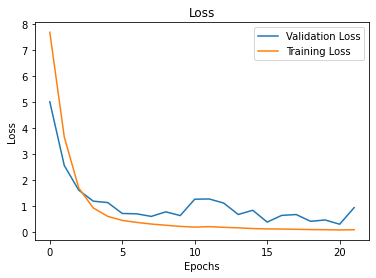

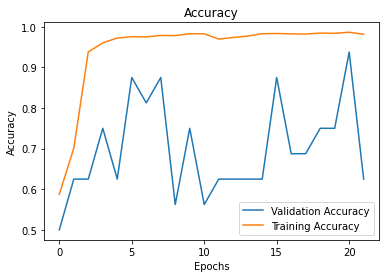

In [61]:
visualize_training_results(results2)

**Observations:**

### Predictions

In [62]:
preds2 = model2.predict(val_images)

In [63]:
predictions2 = preds2 > 0.5

In [64]:
# Print the classification report showing the metrics Recall, Precision, and F1-Score
classification_report = classification_report(val_labels_final, predictions2)
classification_report
# Troubleshoot Error

TypeError: ignored

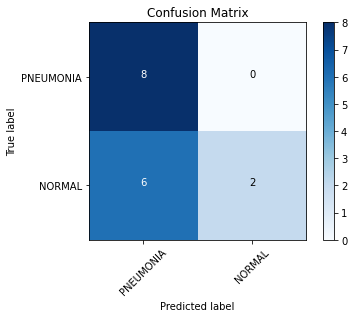

In [65]:
plot_confusion_matrix(val_labels_final, predictions2)
# Troubleshoot Error

## Model 3: Weight Initialization

In [66]:
random.seed(123)

model3 = Sequential()

model3.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', input_shape=(96, 96, 1)))
model3.add(layers.MaxPooling2D((2, 2)))

model3.add(layers.Conv2D(64, (4, 4), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))

model3.add(layers.Conv2D(128, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2,2)))

model3.add(layers.Conv2D(128, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2,2)))

# Flattening- Convert 2D matrix to a 1D vector
model3.add(layers.Flatten())
model3.add(layers.Dense(512, activation = 'relu'))
model3.add(layers.Dense(1, activation='sigmoid'))

In [67]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 94, 94, 32)        320       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 47, 47, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 44, 44, 64)        32832     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 20, 20, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 8, 8, 128)        

In [68]:
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [69]:
save_model = ModelCheckpoint(filepath='model3_weightinit.h5', monitor='val_accuracy', save_best_only=True)

In [70]:
results3 = model3.fit(train_images, train_labels_final, epochs=22, batch_size=1000, callbacks=save_model, validation_data=(val_images, val_labels_final))

Epoch 1/22
12/12 [==============================] - 2s 154ms/step - loss: 0.7078 - accuracy: 0.5455 - val_loss: 0.6888 - val_accuracy: 0.5000
Epoch 2/22
12/12 [==============================] - 2s 138ms/step - loss: 0.4026 - accuracy: 0.8371 - val_loss: 0.5309 - val_accuracy: 0.8125
Epoch 3/22
12/12 [==============================] - 2s 131ms/step - loss: 0.1232 - accuracy: 0.9519 - val_loss: 1.1357 - val_accuracy: 0.6250
Epoch 4/22
12/12 [==============================] - 2s 138ms/step - loss: 0.0797 - accuracy: 0.9667 - val_loss: 0.2620 - val_accuracy: 0.8750
Epoch 5/22
12/12 [==============================] - 2s 130ms/step - loss: 0.0587 - accuracy: 0.9758 - val_loss: 0.2911 - val_accuracy: 0.8750
Epoch 6/22
12/12 [==============================] - 2s 134ms/step - loss: 0.0416 - accuracy: 0.9830 - val_loss: 0.3271 - val_accuracy: 0.8125
Epoch 7/22
12/12 [==============================] - 2s 132ms/step - loss: 0.0362 - accuracy: 0.9848 - val_loss: 0.7331 - val_accuracy: 0.6250
Epoch 

### Evaluation: Model 3

In [71]:
# Training Results
model3.evaluate(train_images, train_labels_final)

350/350 [==============================] - 2s 4ms/step - loss: 0.0039 - accuracy: 0.9993


[0.003936316817998886, 0.9992856979370117]

In [72]:
# Validation Results
model3.evaluate(val_images, val_labels_final)

1/1 [==============================] - 0s 2ms/step - loss: 0.3343 - accuracy: 0.8125


[0.3343070149421692, 0.8125]

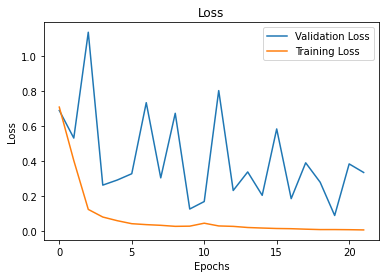

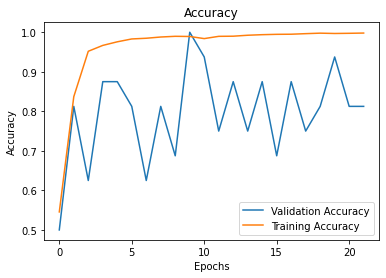

In [73]:
visualize_training_results(results3)

**Observations:**

### Predictions

In [74]:
preds3 = model3.predict(val_images)

In [75]:
predictions3 = preds3 > 0.5

In [ ]:
# Print the classification report showing the metrics Recall, Precision, and F1-Score
classification_report = classification_report(val_labels_final, predictions3)
classification_report


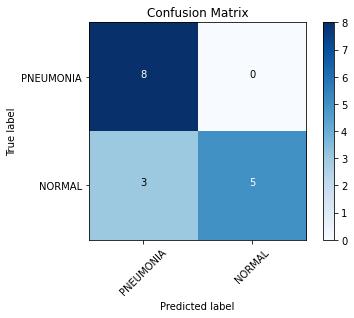

In [76]:
plot_confusion_matrix(val_labels_final, predictions3)


## Model 4: Dropout Regularization


In [77]:
random.seed(123)

model4 = Sequential()

model4.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(96, 96, 1)))
model4.add(layers.MaxPooling2D((2, 2)))

model4.add(layers.Conv2D(64, (4, 4), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))

model4.add(layers.Conv2D(128, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2,2)))
model4.add(Dropout(0.4))

model4.add(layers.Conv2D(128, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2,2)))
model4.add(Dropout(0.4))

# Flattening- Convert 2D matrix to a 1D vector
model4.add(layers.Flatten())
model4.add(layers.Dense(512, activation = 'relu'))
model4.add(Dropout(0.2))
model4.add(layers.Dense(1, activation='sigmoid'))

In [78]:
model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [79]:
save_model = ModelCheckpoint(filepath='model4_dropout.h5', monitor='val_accuracy', save_best_only=True)

In [80]:
results4 = model4.fit(train_images, train_labels_final, epochs=22, batch_size=1000, callbacks=save_model, validation_data=(val_images, val_labels_final))

Epoch 1/22
12/12 [==============================] - 2s 152ms/step - loss: 0.6710 - accuracy: 0.5386 - val_loss: 0.6346 - val_accuracy: 0.5625
Epoch 2/22
12/12 [==============================] - 2s 139ms/step - loss: 0.3883 - accuracy: 0.8338 - val_loss: 0.7357 - val_accuracy: 0.6250
Epoch 3/22
12/12 [==============================] - 2s 140ms/step - loss: 0.1459 - accuracy: 0.9455 - val_loss: 0.5156 - val_accuracy: 0.6875
Epoch 4/22
12/12 [==============================] - 2s 139ms/step - loss: 0.1014 - accuracy: 0.9607 - val_loss: 0.2729 - val_accuracy: 0.8750
Epoch 5/22
12/12 [==============================] - 2s 141ms/step - loss: 0.0729 - accuracy: 0.9695 - val_loss: 0.2061 - val_accuracy: 0.9375
Epoch 6/22
12/12 [==============================] - 2s 133ms/step - loss: 0.0657 - accuracy: 0.9721 - val_loss: 0.2305 - val_accuracy: 0.8750
Epoch 7/22
12/12 [==============================] - 2s 136ms/step - loss: 0.0527 - accuracy: 0.9794 - val_loss: 0.8692 - val_accuracy: 0.6250
Epoch 

### Evaluation: Model 4

In [81]:
model4.evaluate(train_images, train_labels_final)

350/350 [==============================] - 1s 4ms/step - loss: 0.0221 - accuracy: 0.9911


[0.022072048857808113, 0.9910714030265808]

In [82]:
model4.evaluate(val_images, val_labels_final)

1/1 [==============================] - 0s 2ms/step - loss: 0.1231 - accuracy: 1.0000


[0.1231384426355362, 1.0]

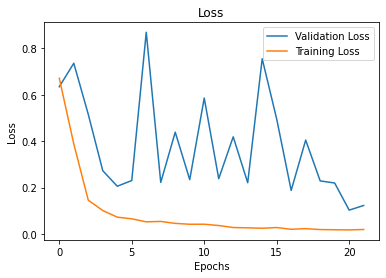

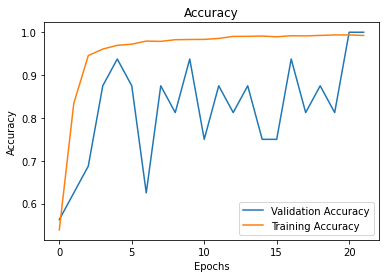

In [83]:
visualize_training_results(results4)

**Observations:**

### Predictions

In [84]:
preds4 = model4.predict(val_images)

In [85]:
predictions4 = preds4 > 0.5

In [ ]:
# Print the classification report showing the metrics Recall, Precision, and F1-Score
classification_report = classification_report(val_labels_final, predictions4)
classification_report


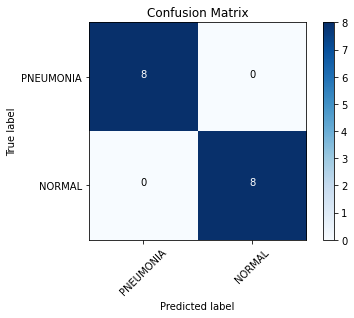

In [86]:
plot_confusion_matrix(val_labels_final, predictions4)


## Model 5: Weight Constraint, unit_norm

In [87]:
random.seed(123)
model5 = Sequential()

model5.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_constraint=unit_norm(), input_shape=(96, 96, 1)))
model5.add(layers.MaxPooling2D((2, 2)))

model5.add(layers.Conv2D(64, (4, 4), activation='relu'))
model5.add(layers.MaxPooling2D((2, 2)))

model5.add(layers.Conv2D(128, (3, 3), activation='relu'))
model5.add(layers.MaxPooling2D((2,2)))


model5.add(layers.Conv2D(128, (3, 3), activation='relu'))
model5.add(layers.MaxPooling2D((2,2)))


# Flattening- Convert 2D matrix to a 1D vector
model5.add(layers.Flatten())
model5.add(layers.Dense(512, activation = 'relu'))
model5.add(layers.Dense(1, activation='sigmoid'))

In [88]:
model5.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [89]:
save_model = ModelCheckpoint(filepath='model5_unitnorm.h5', monitor='val_accuracy', save_best_only=True)

In [90]:
results5 = model5.fit(train_images, train_labels_final, epochs=22, batch_size=1000, callbacks=save_model, validation_data=(val_images, val_labels_final))

Epoch 1/22
12/12 [==============================] - 2s 151ms/step - loss: 0.8299 - accuracy: 0.5312 - val_loss: 0.6922 - val_accuracy: 0.5000
Epoch 2/22
12/12 [==============================] - 2s 137ms/step - loss: 0.5160 - accuracy: 0.7735 - val_loss: 0.5393 - val_accuracy: 0.6875
Epoch 3/22
12/12 [==============================] - 2s 136ms/step - loss: 0.1454 - accuracy: 0.9511 - val_loss: 0.4234 - val_accuracy: 0.8750
Epoch 4/22
12/12 [==============================] - 2s 132ms/step - loss: 0.0795 - accuracy: 0.9683 - val_loss: 0.3619 - val_accuracy: 0.8750
Epoch 5/22
12/12 [==============================] - 2s 131ms/step - loss: 0.0648 - accuracy: 0.9729 - val_loss: 0.3147 - val_accuracy: 0.8750
Epoch 6/22
12/12 [==============================] - 2s 133ms/step - loss: 0.0506 - accuracy: 0.9809 - val_loss: 0.4988 - val_accuracy: 0.7500
Epoch 7/22
12/12 [==============================] - 2s 139ms/step - loss: 0.0476 - accuracy: 0.9822 - val_loss: 0.1641 - val_accuracy: 1.0000
Epoch 

### Evaluation: Model 5

In [91]:
model5.evaluate(train_images, train_labels_final)

350/350 [==============================] - 2s 4ms/step - loss: 0.0086 - accuracy: 0.9973


[0.008566685020923615, 0.9973214268684387]

In [92]:
model5.evaluate(val_images, val_labels_final)

1/1 [==============================] - 0s 2ms/step - loss: 0.0506 - accuracy: 1.0000


[0.050577785819768906, 1.0]

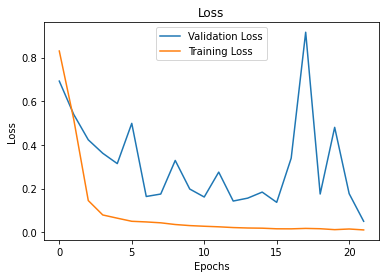

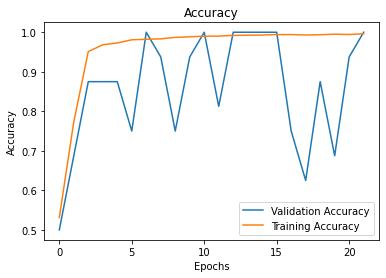

In [93]:
visualize_training_results(results5)

**Observation:**

### Predictions

In [94]:
preds5 = model5.predict(val_images)

In [95]:
predictions5 = preds5 > 0.5

In [ ]:
# Print the classification report showing the metrics Recall, Precision, and F1-Score
classification_report = classification_report(val_labels_final, predictions5)
classification_report


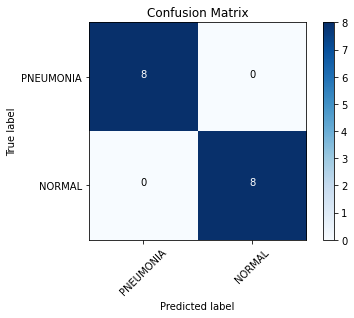

In [96]:
plot_confusion_matrix(val_labels_final, predictions5)


## Model 6: Weight Constraints, Min-Max Value [0.5,  2]

In [97]:
random.seed(123)
model6 = Sequential()

model6.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_constraint=min_max_norm(min_value=0.5, max_value=2.0), input_shape=(96, 96, 1)))
model6.add(layers.MaxPooling2D((2, 2)))

model6.add(layers.Conv2D(64, (4, 4), activation='relu'))
model6.add(layers.MaxPooling2D((2, 2)))

model6.add(layers.Conv2D(128, (3, 3), activation='relu'))
model6.add(layers.MaxPooling2D((2,2)))


model6.add(layers.Conv2D(128, (3, 3), activation='relu'))
model6.add(layers.MaxPooling2D((2,2)))


# Flattening- Convert 2D matrix to a 1D vector
model6.add(layers.Flatten())
model6.add(layers.Dense(512, activation = 'relu'))
model6.add(layers.Dense(1, activation='sigmoid'))

In [98]:
model6.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 94, 94, 32)        320       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 47, 47, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 44, 44, 64)        32832     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 20, 20, 128)       73856     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 8, 8, 128)        

In [99]:
model6.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [101]:
save_model = ModelCheckpoint(filepath='model6_minmax.h5', monitor='val_accuracy', save_best_only=True)

In [102]:
results6 = model6.fit(train_images, train_labels_final, epochs=22, batch_size=1000, callbacks = save_model, validation_data=(val_images, val_labels_final))

Epoch 1/22
12/12 [==============================] - 2s 151ms/step - loss: 0.4369 - accuracy: 0.8439 - val_loss: 1.0632 - val_accuracy: 0.6250
Epoch 2/22
12/12 [==============================] - 2s 133ms/step - loss: 0.1478 - accuracy: 0.9449 - val_loss: 0.8365 - val_accuracy: 0.6250
Epoch 3/22
12/12 [==============================] - 2s 134ms/step - loss: 0.0916 - accuracy: 0.9613 - val_loss: 0.9589 - val_accuracy: 0.6250
Epoch 4/22
12/12 [==============================] - 2s 138ms/step - loss: 0.0711 - accuracy: 0.9691 - val_loss: 0.4864 - val_accuracy: 0.7500
Epoch 5/22
12/12 [==============================] - 2s 137ms/step - loss: 0.0561 - accuracy: 0.9771 - val_loss: 0.2853 - val_accuracy: 0.8750
Epoch 6/22
12/12 [==============================] - 2s 132ms/step - loss: 0.0510 - accuracy: 0.9806 - val_loss: 0.6097 - val_accuracy: 0.6875
Epoch 7/22
12/12 [==============================] - 2s 133ms/step - loss: 0.0343 - accuracy: 0.9862 - val_loss: 0.3916 - val_accuracy: 0.7500
Epoch 

### Evaluation: Model 6

In [103]:
model6.evaluate(train_images, train_labels_final)

350/350 [==============================] - 1s 4ms/step - loss: 0.0054 - accuracy: 0.9982


[0.005354713648557663, 0.9982143044471741]

In [104]:
model6.evaluate(val_images, val_labels_final)

1/1 [==============================] - 0s 3ms/step - loss: 0.2437 - accuracy: 0.8750


[0.24374094605445862, 0.875]

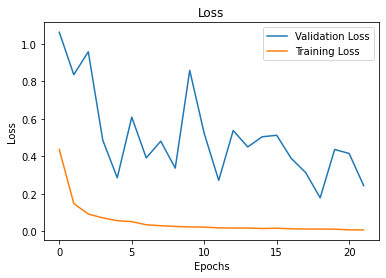

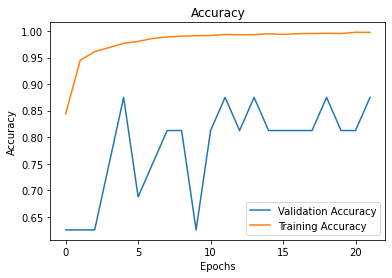

In [105]:
visualize_training_results(results6)

**Observations:**

### Predictions

In [106]:
preds6 = model6.predict(val_images)

In [107]:
predictions6 = preds6 > 0.5

In [ ]:
# Print the classification report showing the metrics Recall, Precision, and F1-Score
classification_report = classification_report(val_labels_final, predictions6)
classification_report


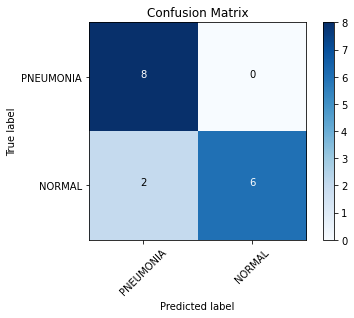

In [108]:
plot_confusion_matrix(val_labels_final, predictions6)


# Increase Testing Accuracy by Adding 4000 Training Images 

## Add 2000 Normal Images

In [32]:
count = 0
for batch in datagen.flow(norm_img_array, batch_size=500, save_to_dir=norm_dir, save_prefix='IM', save_format='jpeg'):
    count +=1
    if count == 7100:
        break
print('2000 images have been generated at', norm_dir)



2000 images have been generated at /content/drive/My Drive/chest_xray/train/NORMAL/


## Add 2000 Pneumonia Images

In [33]:
count = 0
for batch in datagen.flow(pneum_img_array, batch_size=500, save_to_dir=pneum_dir, save_prefix='IM', save_format='jpeg'):
    count +=1
    if count == 7100:
        break
print('2000 additional images have been generated at', pneum_dir)
    

2000 additional images have been generated at /content/drive/My Drive/chest_xray/train/PNEUMONIA/


## Preprocessing: Part 2

In [34]:
# Resize all 15,200 images in the train directory
# Use default color mode so the image arrays have 3 channels (n x m x 3) as required for Pretrained Models
train_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(train_dir,
                                                     target_size=(96,96), batch_size=15200)

Found 20574 images belonging to 2 classes.


In [119]:
# Resize all 16 images in the train directory
val_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(val_dir,
                                                   target_size=(96,96), batch_size=16)

Found 16 images belonging to 2 classes.


In [120]:
# Resize all 624 images in the train directory
test_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(test_dir,
                                                   target_size=(96,96), batch_size=624)

Found 624 images belonging to 2 classes.


### Generate Image and Label Sets

In [123]:
# Iterate through all of the images and create image-label datasets
pretrain_images, pretrain_labels = next(train_gen)

In [121]:
# Iterate through all of the images and create image-label datasets
preval_images, preval_labels = next(val_gen)

In [122]:
# Iterate through all of the images and create image-label datasets
pretest_images, pretest_labels = next(test_gen)

### Check the Shape of the Images and Labels

In [124]:
print('Shape of Train Images: ', np.shape(pretrain_images))
print('Shape of Train Labels: ', np.shape(pretrain_labels))
print('Shape of Validation Images: ', np.shape(preval_images))
print('Shape of Validation Labels: ', np.shape(preval_labels))
print('Shape of Test Images: ', np.shape(pretest_images))
print('Shape of Test Labels: ', np.shape(pretest_labels))

Shape of Train Images:  (15200, 96, 96, 3)
Shape of Train Labels:  (15200, 2)
Shape of Validation Images:  (16, 96, 96, 3)
Shape of Validation Labels:  (16, 2)
Shape of Test Images:  (624, 96, 96, 3)
Shape of Test Labels:  (624, 2)


### Transform the labels to (m X 1) matrices



In [126]:
pretrain_labels_final = np.reshape(pretrain_labels[:,0], (15200,1))
np.shape(pretrain_labels_final)

(15200, 1)

In [127]:
preval_labels_final = np.reshape(preval_labels[:,0], (16,1))
np.shape(preval_labels_final)

(16, 1)

In [128]:
pretest_labels_final = np.reshape(pretest_labels[:,0], (624,1))
np.shape(pretest_labels_final)

(624, 1)

### Verify the Image and Label Pairs

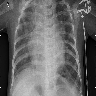

In [129]:
# Select a random image to verify
array_to_img(pretrain_images[14000])

In [130]:
# Return the respective label and verify that the label matches the image
pretrain_labels_final[14000, :]

array([0.], dtype=float32)

## Model 7: Pretrained, VGG16

In [109]:
# Update the input shape from the default settings of the VGG16
# model to (96, 96, 1) the input shape of the training images
pretrain_mod1 = VGG16(include_top=False, input_shape=(96,96,3))

58892288/58889256 [==============================] - 2s 0us/step


In [110]:
# Review the summary of the model
pretrain_mod1.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 96, 96, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 96, 96, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 96, 96, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 48, 48, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 48, 48, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 48, 48, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 24, 24, 128)       0     

In [111]:
model7 = Sequential()

# Import trhe pretrained model (layers)
model7.add(pretrain_mod1)

# Add the 1D Layer
model7.add(layers.Flatten())
model7.add(layers.Dense(512, activation='relu'))
model7.add(layers.Dense(1, activation='sigmoid'))

### Freeze The Convolutional Base 

In [112]:
# Check whether the layer is trainable (or alter its setting)
for layer in model7.layers:
    print(layer.name, layer.trainable)
    
# Check how many trainable weights are in the model
print(len(model7.trainable_weights))

vgg16 True
flatten_7 True
dense_14 True
dense_15 True
30


In [113]:
# Freeze the convoultional base all of the weights associated
# with that layer(s) will remain unchanged through the optimization process
pretrain_mod1.trainable = False

In [114]:
# Do a sanity check to make sure the layers are actually frozen
for layer in model7.layers:
    print(layer.name, layer.trainable)
    
print(len(model7.trainable_weights))

vgg16 False
flatten_7 True
dense_14 True
dense_15 True
4


In [115]:
save_model = ModelCheckpoint(filepath='model7_pretrain.h5', monitor='val_accuracy', save_best_only=True)

In [116]:
model7.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [131]:
results7 = model7.fit(pretrain_images, pretrain_labels_final, epochs=22, batch_size=1000, callbacks= save_model, validation_data=(preval_images, preval_labels_final))

Epoch 1/22
16/16 [==============================] - 7s 420ms/step - loss: 0.4110 - accuracy: 0.8278 - val_loss: 0.4013 - val_accuracy: 0.8750
Epoch 2/22
16/16 [==============================] - 5s 338ms/step - loss: 0.0795 - accuracy: 0.9678 - val_loss: 0.5144 - val_accuracy: 0.8750
Epoch 3/22
16/16 [==============================] - 5s 335ms/step - loss: 0.0553 - accuracy: 0.9786 - val_loss: 0.3534 - val_accuracy: 0.8750
Epoch 4/22
16/16 [==============================] - 5s 334ms/step - loss: 0.0454 - accuracy: 0.9822 - val_loss: 0.2906 - val_accuracy: 0.8750
Epoch 5/22
16/16 [==============================] - 5s 338ms/step - loss: 0.0390 - accuracy: 0.9849 - val_loss: 0.2834 - val_accuracy: 0.8750
Epoch 6/22
16/16 [==============================] - 5s 340ms/step - loss: 0.0350 - accuracy: 0.9871 - val_loss: 0.2978 - val_accuracy: 0.8750
Epoch 7/22
16/16 [==============================] - 5s 342ms/step - loss: 0.0318 - accuracy: 0.9886 - val_loss: 0.2371 - val_accuracy: 0.8750
Epoch 

### Evaluation: Model 7

In [132]:
model7.evaluate(pretrain_images, pretrain_labels_final)

475/475 [==============================] - 8s 17ms/step - loss: 0.0135 - accuracy: 0.9958


[0.013520431704819202, 0.9957894682884216]

In [133]:
model7.evaluate(preval_images, preval_labels_final)

1/1 [==============================] - 0s 2ms/step - loss: 0.1921 - accuracy: 0.9375


[0.19210511445999146, 0.9375]

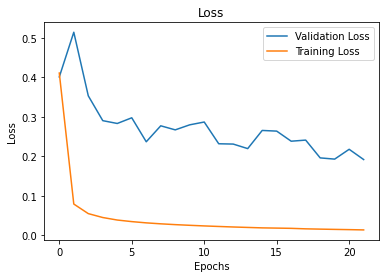

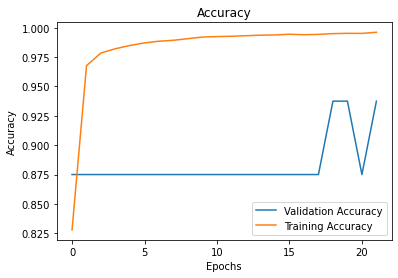

In [138]:
visualize_training_results(results7)

**Observations:**

### Predictions

In [135]:
preds7 = model7.predict(preval_images)

In [136]:
pretrain_preds = preds7 > 0.5

In [ ]:
# Print the classification report showing the metrics Recall, Precision, and F1-Score
classification_report = classification_report(preval_labels_final, pretrain_preds)
classification_report


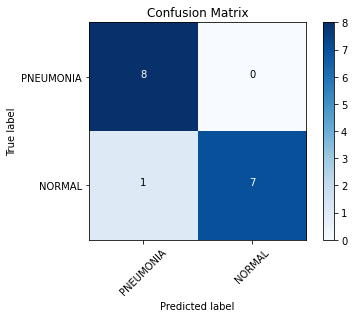

In [137]:
plot_confusion_matrix(preval_labels_final, pretrain_preds)


## Model 8: Pretrained Model, Inception - try Later

In [ ]:
inception_mod = InceptionV3(input_shape = (96, 96, 3), include_top = False, weights = None)

In [ ]:
for layer in inception_mod.layers:
    layer.trainable = False

# 5. Evaluation
Train Images using the Test Data and the best performing model.

In [139]:
random.seed(123)

best_model5 = Sequential()

best_model5.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_constraint=unit_norm(), input_shape=(96, 96, 3)))
best_model5.add(layers.MaxPooling2D((2, 2)))

best_model5.add(layers.Conv2D(64, (4, 4), activation='relu'))
best_model5.add(layers.MaxPooling2D((2, 2)))

best_model5.add(layers.Conv2D(128, (3, 3), activation='relu'))
best_model5.add(layers.MaxPooling2D((2,2)))


best_model5.add(layers.Conv2D(128, (3, 3), activation='relu'))
best_model5.add(layers.MaxPooling2D((2,2)))


# Flattening- Convert 2D matrix to a 1D vector
best_model5.add(layers.Flatten())
best_model5.add(layers.Dense(512, activation = 'relu'))
best_model5.add(layers.Dense(1, activation='sigmoid'))

In [140]:
best_model5.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 94, 94, 32)        896       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 47, 47, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 44, 44, 64)        32832     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 20, 20, 128)       73856     
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 8, 8, 128)        

In [141]:
best_model5.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [142]:
save_model = ModelCheckpoint(filepath='best_model5.h5', monitor='val_accuracy', save_best_only=True)

In [144]:
test_results1 = best_model5.fit(pretrain_images, pretrain_labels_final, epochs=22, batch_size=1000, callbacks=save_model, validation_data=(pretest_images, pretest_labels_final))

Epoch 1/22
16/16 [==============================] - 3s 158ms/step - loss: 0.0305 - accuracy: 0.9881 - val_loss: 0.7252 - val_accuracy: 0.7644
Epoch 2/22
16/16 [==============================] - 3s 158ms/step - loss: 0.0250 - accuracy: 0.9911 - val_loss: 0.7499 - val_accuracy: 0.7660
Epoch 3/22
16/16 [==============================] - 2s 154ms/step - loss: 0.0214 - accuracy: 0.9923 - val_loss: 0.8084 - val_accuracy: 0.7580
Epoch 4/22
16/16 [==============================] - 3s 156ms/step - loss: 0.0208 - accuracy: 0.9924 - val_loss: 0.9779 - val_accuracy: 0.7500
Epoch 5/22
16/16 [==============================] - 3s 158ms/step - loss: 0.0185 - accuracy: 0.9931 - val_loss: 0.5956 - val_accuracy: 0.8013
Epoch 6/22
16/16 [==============================] - 3s 157ms/step - loss: 0.0167 - accuracy: 0.9943 - val_loss: 0.6322 - val_accuracy: 0.7997
Epoch 7/22
16/16 [==============================] - 3s 160ms/step - loss: 0.0146 - accuracy: 0.9953 - val_loss: 1.0897 - val_accuracy: 0.7548
Epoch 

### Evaluate: Best_Model5

In [145]:
best_model5.evaluate(pretrain_images, pretrain_labels_final)

475/475 [==============================] - 2s 5ms/step - loss: 0.0012 - accuracy: 1.0000


[0.0012193092843517661, 1.0]

In [147]:
best_model5.evaluate(pretest_images, pretest_labels_final)

20/20 [==============================] - 0s 5ms/step - loss: 1.7348 - accuracy: 0.7564


[1.7348278760910034, 0.7564102411270142]

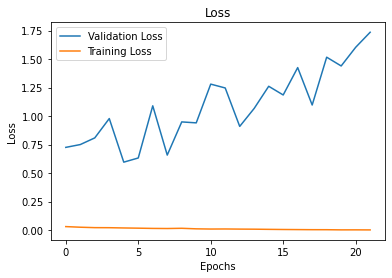

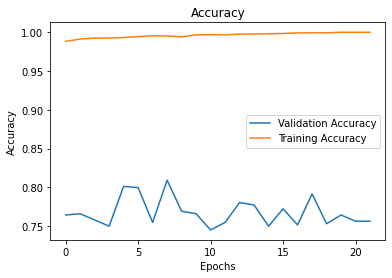

In [146]:
visualize_training_results(test_results1)

**Observations:**

### Predictions

In [148]:
pred_mod5 = best_model5.predict(pretest_images)

In [149]:
predictions_mod5 = pred_mod5 > 0.5

In [ ]:
# Print the classification report showing the metrics Recall, Precision, and F1-Score
classification_report = classification_report(pretest_labels_final, predictions_mod5)
classification_report


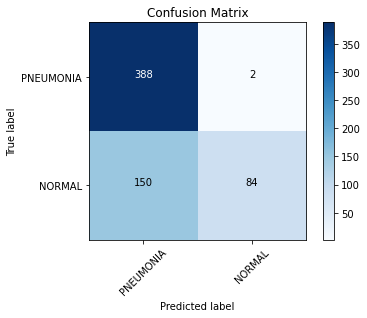

In [150]:
plot_confusion_matrix(pretest_labels_final, predictions_mod5)


# Increasing Learning rate to 0.005 increased loss to 7.7 and decreased accuarcy to 0.5.

## Add 1 additional layer with 256 units and Increase Batch size to 1500

In [151]:
best_model51 = Sequential()

best_model51.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_constraint=unit_norm(), input_shape=(96, 96, 3)))
best_model51.add(layers.MaxPooling2D((2, 2)))

best_model51.add(layers.Conv2D(64, (4, 4), activation='relu'))
best_model51.add(layers.MaxPooling2D((2, 2)))

best_model51.add(layers.Conv2D(128, (3, 3), activation='relu'))
best_model51.add(layers.MaxPooling2D((2,2)))

best_model51.add(layers.Conv2D(128, (3, 3), activation='relu'))
best_model51.add(layers.MaxPooling2D((2,2)))

best_model51.add(layers.Conv2D(256, (3, 3), activation='relu'))
best_model51.add(layers.MaxPooling2D((2,2)))


# Flattening- Convert 2D matrix to a 1D vector
best_model51.add(layers.Flatten())
best_model51.add(layers.Dense(512, activation = 'relu'))
best_model51.add(layers.Dense(1, activation='sigmoid'))

In [152]:
best_model51.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [154]:
save_model = ModelCheckpoint(filepath='best_model51.h5', monitor='val_accuracy', save_best_only=True)

In [155]:
test_results2 = best_model51.fit(pretrain_images, pretrain_labels_final, epochs=22, batch_size=1500, callbacks=save_model,  validation_data=(pretest_images, pretest_labels_final))

Epoch 1/22
11/11 [==============================] - 2s 220ms/step - loss: 0.0492 - accuracy: 0.9800 - val_loss: 0.4843 - val_accuracy: 0.7917
Epoch 2/22
11/11 [==============================] - 2s 220ms/step - loss: 0.0361 - accuracy: 0.9861 - val_loss: 0.5683 - val_accuracy: 0.7917
Epoch 3/22
11/11 [==============================] - 3s 227ms/step - loss: 0.0329 - accuracy: 0.9870 - val_loss: 0.4343 - val_accuracy: 0.8413
Epoch 4/22
11/11 [==============================] - 2s 220ms/step - loss: 0.0288 - accuracy: 0.9892 - val_loss: 1.0389 - val_accuracy: 0.7035
Epoch 5/22
11/11 [==============================] - 2s 222ms/step - loss: 0.0275 - accuracy: 0.9888 - val_loss: 0.3782 - val_accuracy: 0.8558
Epoch 6/22
11/11 [==============================] - 2s 222ms/step - loss: 0.0242 - accuracy: 0.9906 - val_loss: 0.7619 - val_accuracy: 0.7740
Epoch 7/22
11/11 [==============================] - 2s 221ms/step - loss: 0.0213 - accuracy: 0.9918 - val_loss: 0.8318 - val_accuracy: 0.7612
Epoch 

### Evaluate: Model51

In [156]:
best_model51.evaluate(pretrain_images, pretrain_labels_final)

475/475 [==============================] - 2s 5ms/step - loss: 0.0027 - accuracy: 0.9993


[0.002726124133914709, 0.9993420839309692]

In [157]:
best_model51.evaluate(pretest_images, pretest_labels_final)

20/20 [==============================] - 0s 5ms/step - loss: 1.0399 - accuracy: 0.7997


[1.0398637056350708, 0.7996794581413269]

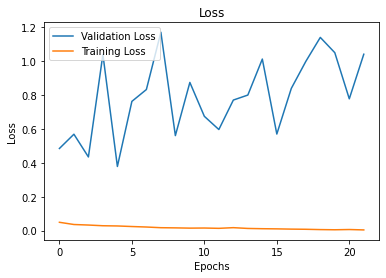

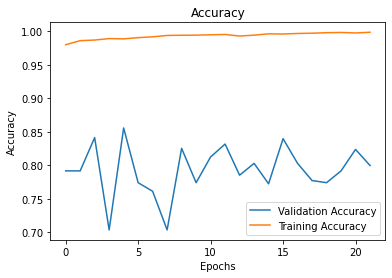

In [158]:
visualize_training_results(test_results2)

**Observations:**

### Predictions

In [159]:
preds51 = best_model51.predict(pretest_images)

In [160]:
predictions51 = preds51 > 0.5

In [ ]:
classification_report = classification_report(pretest_labels_final, predictions51)
classification_report


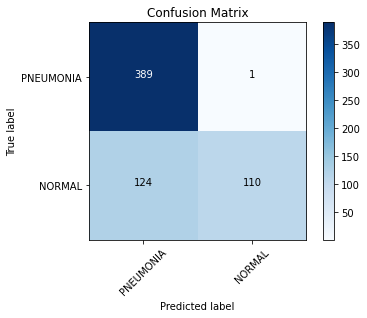

In [161]:
plot_confusion_matrix(pretest_labels_final, predictions51)


# Try Softmax output function- Yielded loss starting loss of 7.95. Stopped function early

# Try lr 0.1. Had loss of 6.95


## Prepreproessing: Part 3, Try Images size 128x128

### Rezise all Images to 128x128

In [35]:
# Resize all 15,200 images in the train directory
# Use default color mode so the image arrays have 3 channels (n x m x 3) as required for Pretrained Models
train_gen2 = ImageDataGenerator(rescale=1./255).flow_from_directory(train_dir,
                                                     target_size=(128,128), batch_size=15200)

Found 20574 images belonging to 2 classes.


In [6]:
val_gen2 = ImageDataGenerator(rescale=1./255).flow_from_directory(val_dir,
                                                     target_size=(128,128), batch_size=16)

Found 16 images belonging to 2 classes.


In [7]:
test_gen2 = ImageDataGenerator(rescale=1./255).flow_from_directory(test_dir,
                                                     target_size=(128,128), batch_size=624)

Found 624 images belonging to 2 classes.


### Generate Image and Label Sets

In [36]:
# Iterate through all of the images and create image-label datasets
train_images2, train_labels2 = next(train_gen2)

In [37]:
val_images2, val_labels2 = next(val_gen2)

In [38]:
test_images2, test_labels2 = next(test_gen2)

In [39]:
# Recheck for Class Imbalance
u = np.unique(train_labels2, return_counts=True)
np.asarray(u).T


array([[0.00e+00, 1.52e+04],
       [1.00e+00, 1.52e+04]])

### Check the Shape of the Images and Labels

In [40]:
print('Shape of Train Images: ', np.shape(train_images2))
print('Shape of Train Labels: ', np.shape(train_labels2))
print('Shape of Validation Images: ', np.shape(val_images2))
print('Shape of Validation Labels: ', np.shape(val_labels2))
print('Shape of Test Images: ', np.shape(test_images2))
print('Shape of Test Labels: ', np.shape(test_labels2))

Shape of Train Images:  (15200, 128, 128, 3)
Shape of Train Labels:  (15200, 2)
Shape of Validation Images:  (16, 128, 128, 3)
Shape of Validation Labels:  (16, 2)
Shape of Test Images:  (624, 128, 128, 3)
Shape of Test Labels:  (624, 2)


### Transform the labels to (m X 1) matrices



In [41]:
train_labels_final2 = np.reshape(train_labels2[:,0], (15200,1))
np.shape(train_labels_final2)

(15200, 1)

In [42]:
val_labels_final2 = np.reshape(val_labels2[:,0], (16,1))
np.shape(val_labels_final2)

(16, 1)

In [43]:
test_labels_final2 = np.reshape(test_labels2[:,0], (624,1))
np.shape(test_labels_final2)

(624, 1)

### Verify the Image and Label Pairs


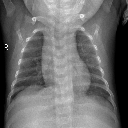

In [173]:
# Select a random image to verify
array_to_img(train_images2[15000])

In [174]:
# Return the respective label and verify that the label matches the image
train_labels_final2[15000, :]

array([1.], dtype=float32)

## Model128 : 128x128 Images 

In [175]:
random.seed(123)

model128 = Sequential()

model128.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_constraint=unit_norm(), input_shape=(128, 128, 3)))
model128.add(layers.MaxPooling2D((2, 2)))

model128.add(layers.Conv2D(64, (4, 4), activation='relu'))
model128.add(layers.MaxPooling2D((2, 2)))

model128.add(layers.Conv2D(128, (3, 3), activation='relu'))
model128.add(layers.MaxPooling2D((2,2)))

model128.add(layers.Conv2D(128, (3, 3), activation='relu'))
model128.add(layers.MaxPooling2D((2,2)))

model128.add(layers.Conv2D(256, (3, 3), activation='relu'))
model128.add(layers.MaxPooling2D((2,2)))


# Flattening- Convert 2D matrix to a 1D vector
model128.add(layers.Flatten())
model128.add(layers.Dense(512, activation = 'relu'))
model128.add(layers.Dense(1, activation='sigmoid'))

In [176]:
model128.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 60, 60, 64)        32832     
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 12, 12, 128)     

In [177]:
model128.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [178]:
save_model = ModelCheckpoint(filepath='model128_px.h5', monitor='val_accuracy', save_best_only=True)

In [179]:
test_results3 = model128.fit(train_images2, train_labels_final2, epochs=22, batch_size=1500, callbacks=save_model, validation_data=(test_images2, test_labels_final2))

Epoch 1/22
11/11 [==============================] - 5s 474ms/step - loss: 0.8303 - accuracy: 0.5639 - val_loss: 0.6813 - val_accuracy: 0.5817
Epoch 2/22
11/11 [==============================] - 5s 410ms/step - loss: 0.5176 - accuracy: 0.8128 - val_loss: 0.4602 - val_accuracy: 0.8077
Epoch 3/22
11/11 [==============================] - 4s 405ms/step - loss: 0.1927 - accuracy: 0.9354 - val_loss: 0.4941 - val_accuracy: 0.7853
Epoch 4/22
11/11 [==============================] - 4s 387ms/step - loss: 0.0972 - accuracy: 0.9608 - val_loss: 0.6336 - val_accuracy: 0.7516
Epoch 5/22
11/11 [==============================] - 4s 404ms/step - loss: 0.0868 - accuracy: 0.9650 - val_loss: 0.3397 - val_accuracy: 0.8622
Epoch 6/22
11/11 [==============================] - 4s 408ms/step - loss: 0.0541 - accuracy: 0.9782 - val_loss: 0.5403 - val_accuracy: 0.7788
Epoch 7/22
11/11 [==============================] - 4s 401ms/step - loss: 0.0396 - accuracy: 0.9837 - val_loss: 0.4627 - val_accuracy: 0.8173
Epoch 

### Evaluate: Model128

In [180]:
model128.evaluate(train_images2, train_labels_final2)

475/475 [==============================] - 3s 7ms/step - loss: 0.0133 - accuracy: 0.9943


[0.013293726369738579, 0.9942763447761536]

In [181]:
model128.evaluate(test_images2, test_labels_final2)

20/20 [==============================] - 0s 8ms/step - loss: 0.6436 - accuracy: 0.8478


[0.643628716468811, 0.8477563858032227]

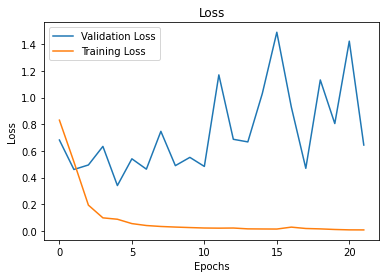

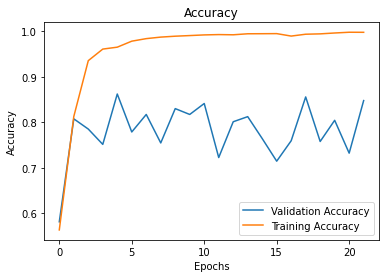

In [182]:
visualize_training_results(test_results3)

**Observations:**

### Predictions

In [183]:
pred128 = model128.predict(test_images2)

In [184]:
predictions128 = pred128 > 0.5

In [ ]:
classification_report = classification_report(test_labels_final2, predictions128)
classification_report

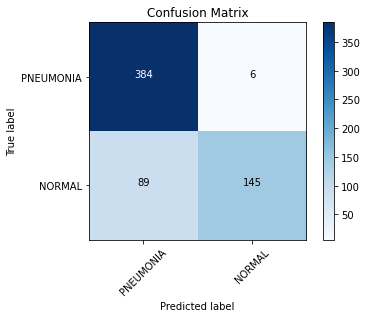

In [185]:
plot_confusion_matrix(test_labels_final2, predictions128)

## Try dropout + unit norm + 128

In [18]:
random.seed(123)

model128_drop = Sequential()

model128_drop.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_constraint=unit_norm(), input_shape=(128, 128, 3)))
model128_drop.add(layers.MaxPooling2D((2, 2)))

model128_drop.add(layers.Conv2D(64, (4, 4), activation='relu'))
model128_drop.add(layers.MaxPooling2D((2, 2)))

model128_drop.add(layers.Conv2D(128, (3, 3), activation='relu'))
model128_drop.add(layers.MaxPooling2D((2,2)))
model128_drop.add(Dropout(0.4))

model128_drop.add(layers.Conv2D(128, (3, 3), activation='relu'))
model128_drop.add(layers.MaxPooling2D((2,2)))

model128_drop.add(layers.Conv2D(256, (3, 3), activation='relu'))
model128_drop.add(layers.MaxPooling2D((2,2)))
model128_drop.add(Dropout(0.4))

# Flattening- Convert 2D matrix to a 1D vector
model128_drop.add(layers.Flatten())
model128_drop.add(layers.Dense(512, activation = 'relu'))
model128_drop.add(Dropout(0.2))
model128_drop.add(layers.Dense(1, activation='sigmoid'))

In [19]:
model128_drop.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 64)        32832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 128)       0

In [189]:
model128_drop.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [190]:
save_model = ModelCheckpoint(filepath='model128_drop.h5', monitor='val_accuracy', save_best_only=True)

In [191]:
test_results4 = model128_drop.fit(train_images2, train_labels_final2, epochs=22, batch_size=1500, callbacks=save_model, validation_data=(test_images2, test_labels_final2))

Epoch 1/22
11/11 [==============================] - 5s 412ms/step - loss: 0.8918 - accuracy: 0.5142 - val_loss: 0.6876 - val_accuracy: 0.6250
Epoch 2/22
11/11 [==============================] - 4s 403ms/step - loss: 0.6794 - accuracy: 0.5768 - val_loss: 0.6497 - val_accuracy: 0.6266
Epoch 3/22
11/11 [==============================] - 4s 405ms/step - loss: 0.6072 - accuracy: 0.7118 - val_loss: 0.5602 - val_accuracy: 0.7997
Epoch 4/22
11/11 [==============================] - 4s 404ms/step - loss: 0.2334 - accuracy: 0.9020 - val_loss: 0.5599 - val_accuracy: 0.7308
Epoch 5/22
11/11 [==============================] - 5s 431ms/step - loss: 0.1378 - accuracy: 0.9466 - val_loss: 0.4404 - val_accuracy: 0.8093
Epoch 6/22
11/11 [==============================] - 4s 398ms/step - loss: 0.1003 - accuracy: 0.9589 - val_loss: 0.3499 - val_accuracy: 0.8622
Epoch 7/22
11/11 [==============================] - 5s 411ms/step - loss: 0.0800 - accuracy: 0.9665 - val_loss: 0.4964 - val_accuracy: 0.7901
Epoch 

### Evaluate: Model128_drop

In [192]:
model128_drop.evaluate(train_images2, train_labels_final2)

475/475 [==============================] - 3s 7ms/step - loss: 0.0272 - accuracy: 0.9895


[0.02720465138554573, 0.9894737005233765]

In [193]:
model128_drop.evaluate(test_images2, test_labels_final2)

20/20 [==============================] - 0s 6ms/step - loss: 0.4088 - accuracy: 0.8638


[0.4088386297225952, 0.8637820482254028]

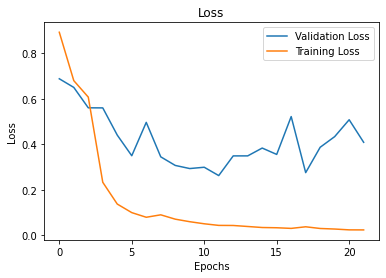

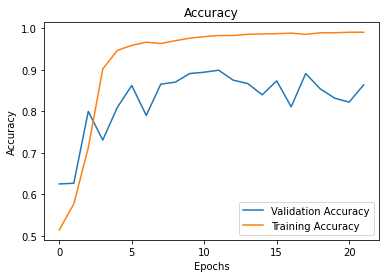

In [194]:
visualize_training_results(test_results4)

**Observations:** 

### Predictions

In [195]:
pred128_drop = model128_drop.predict(test_images2)

In [196]:
predictions128_drop = pred128_drop > 0.5

In [ ]:
classification_report = classification_report(test_labels_final2, predictions128_drop)
classification_report

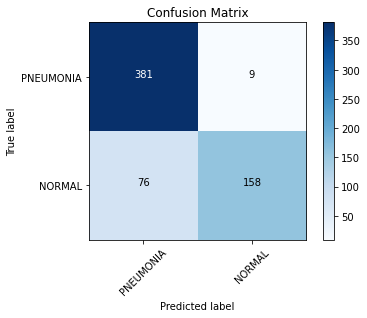

In [197]:
plot_confusion_matrix(test_labels_final2, predictions128_drop)

## Model: 3 Layers

In [44]:
random.seed(123)

model_short = Sequential()

model_short.add(layers.Conv2D(128, (4, 4), activation='relu', kernel_constraint=unit_norm(), input_shape=(128, 128, 3)))
model_short.add(layers.MaxPooling2D((2, 2)))
model_short.add(Dropout(0.4))

model_short.add(layers.Conv2D(256, (3, 3), activation='relu'))
model_short.add(layers.MaxPooling2D((2,2)))
model_short.add(Dropout(0.4))

# Flattening- Convert 2D matrix to a 1D vector
model_short.add(layers.Flatten())
model_short.add(layers.Dense(512, activation = 'relu'))
model_short.add(Dropout(0.2))
model_short.add(layers.Dense(1, activation='sigmoid'))

In [45]:
model_short.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 125, 125, 128)     6272      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 62, 62, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 62, 62, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 256)       295168    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 256)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 30, 256)       0         
_________________________________________________________________
flatten (Flatten)            (None, 230400)            0

In [46]:
model_short.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [47]:
save_model = ModelCheckpoint(filepath='model_short.h5', monitor='val_accuracy', save_best_only=True)

In [ ]:
test_results5 = model_short.fit(train_images2, train_labels_final2, epochs=22, batch_size=1500, callbacks=save_model, validation_data=(test_images2, test_labels_final2))

Epoch 1/22


### Evaluate: Model_short

In [ ]:
model_short.evaluate(train_images2, train_labels_final2)

In [ ]:
model_short.evaluate(test_images, test_labels_finals2)

In [ ]:
visualize_training_results(test_results5)

### Predictions

In [ ]:
pred_short = model_short.predict(test_images2)

In [ ]:
predictions_short = pred_short > 0.5

In [ ]:
classification_report = classification_report(test_labels_final2, predictions128_drop)
classification_report

In [ ]:
plot_confusion_matrix(test_labels_final2, predictions_short)